# Predicting Diets Based On Nutritional Contents Of Dishes


#### By Team 10 - The Foodies
#### Matthew Wang, Jessica Liu, Angel Xu, Kiana Roshanzamir

## Introduction

#### *“Given a dish’s nutritional contents, what kind of diet it is most likely a part of?”*


In our project, we will explore the relationship between a dish’s diet type and its nutritional contents. More specifically, we will focus on dishes from the following diets: Paleo, Dash, Keto, Mediterranean, and Vegan. Since this topic is a classification problem, we will be using training data to classify and predict the diet type of a new dish using its nutritional contents as predictors: protein, carbs, and fat, which are measured in grams. 
 
About the Dataset:

We found the data set on Kaggle, which is a platform that contains datasets gathered from surveys and studies. The raw dataset has 8 columns, including diet type, recipe name, the cuisine the dish belongs to, the amount of protein, carbs, fat, as well as “Extraction_day” and “Extraction_time”. The total dataset has 7806 rows of data.

In [1]:
library(tidyverse)
library(patchwork)
library(RColorBrewer)
library(repr)
library(tidymodels)
library(rvest)
library(readr)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

## Methods & Results

In [2]:
diets_original <- read_delim("https://raw.githubusercontent.com/mwang516/Foodies/main/All_Diets.csv",
                   skip = 1,
                   col_names = c("diet_type", "recipe_name", "cuisine_type", "protein", "carbs", "fat", "extraction_day", "extraction_time"))

diets_original # The dataset

Rows: 7806 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): diet_type, recipe_name, cuisine_type
dbl  (3): protein, carbs, fat
date (1): extraction_day
time (1): extraction_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


diet_type,recipe_name,cuisine_type,protein,carbs,fat,extraction_day,extraction_time
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<time>
paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet & Crispy Appetizer",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,2022-10-16,20:40:44
dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44
dash,Emeril's Classic Manhattan,american,0.02,0.83,0.00,2022-10-16,20:40:44


In [3]:
set.seed(69)

diets <- diets_original |>  # Training Data
    select(diet_type, protein, carbs, fat) |>
    mutate(diet_type = as_factor(diet_type))

diets_split <- initial_split(diets, prop = 0.75, strata = diet_type)
diets_train <- training(diets_split)
diets_test <- testing(diets_split)

print("Training Data")
diets_train

diets_count <- diets_train |>  # Summary of Count of Each Diet
    group_by(diet_type) |>
    summarize(count = n())
print("Summary of Count of Each Diet")
diets_count

diets_nutrition_avg <- diets_train |>  # Summary of Average Nutritional Content of Each Diet
    group_by(diet_type) |>
    summarize(protein_mean = mean(protein),
             carbs_mean = mean(carbs),
             fat_mean = mean(fat))
print("Summary of Average Nutritional Content of Each Diet")
diets_nutrition_avg

[1] "Training Data"


diet_type,protein,carbs,fat
<fct>,<dbl>,<dbl>,<dbl>
dash,1.90,236.76,1.02
dash,137.31,120.32,35.92
dash,29.41,75.78,47.80
⋮,⋮,⋮,⋮
vegan,56.28,65.62,90.77
vegan,28.65,364.77,168.68
vegan,60.29,469.33,108.76


[1] "Summary of Count of Each Diet"


diet_type,count
<fct>,<int>
paleo,955
vegan,1141
keto,1134
mediterranean,1314
dash,1308


[1] "Summary of Average Nutritional Content of Each Diet"


diet_type,protein_mean,carbs_mean,fat_mean
<fct>,<dbl>,<dbl>,<dbl>
paleo,88.85634,128.57928,137.4332
vegan,56.07040,253.41222,103.2545
keto,101.20914,58.01987,154.7812
mediterranean,99.70286,151.82721,103.5231
dash,70.60565,165.07945,103.3729


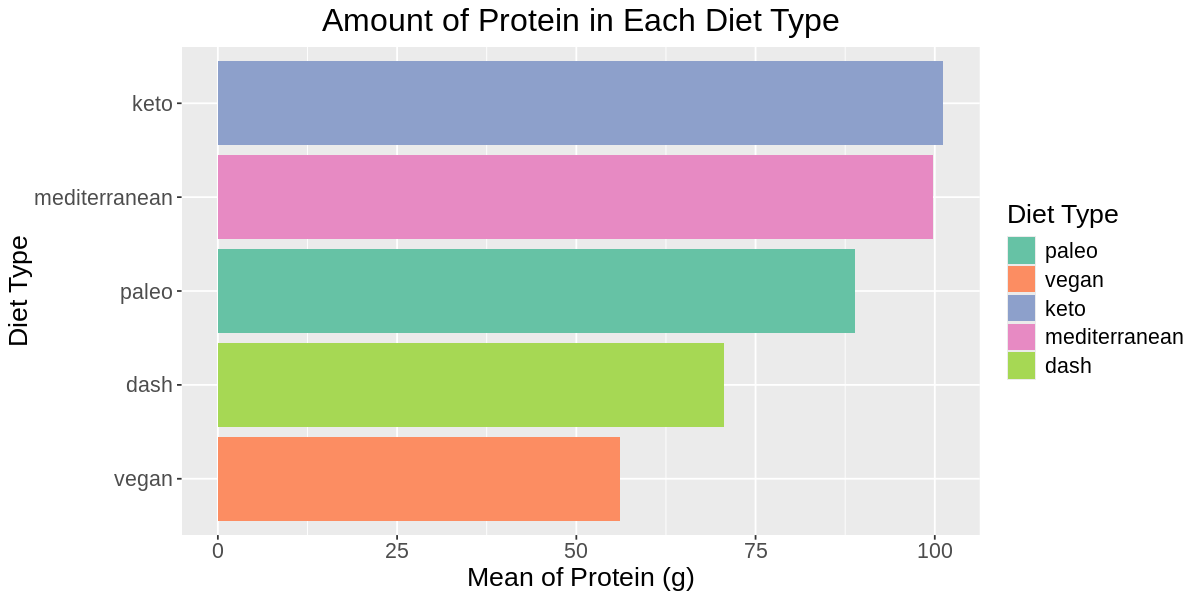

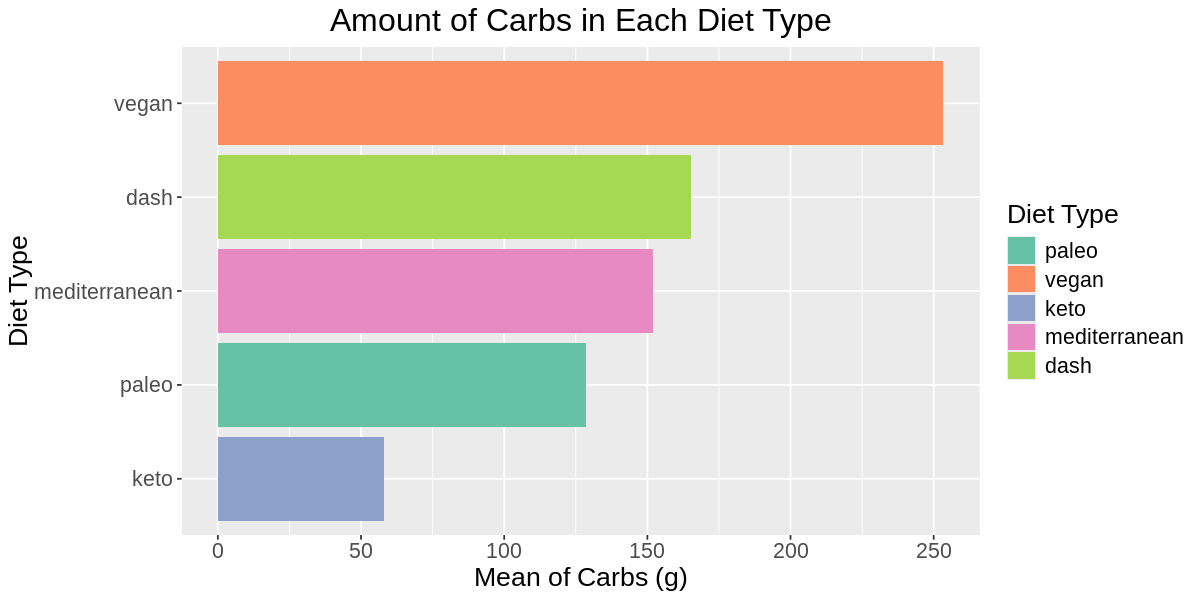

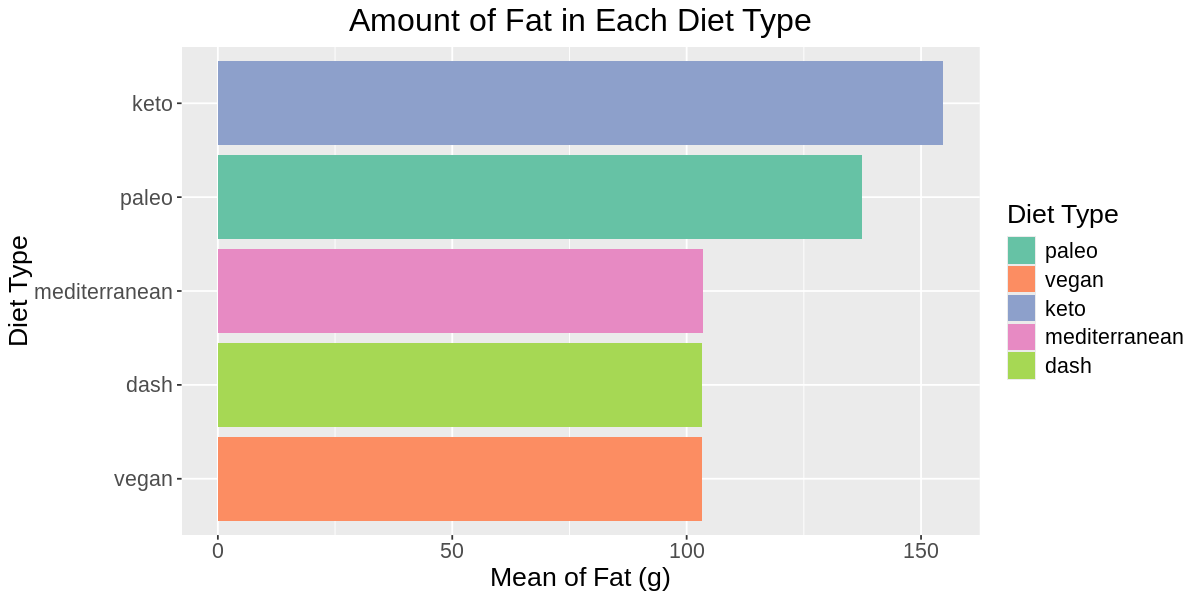

In [26]:
options(repr.plot.width = 10, repr.plot.height = 5)

diets_protein_plot <- diets_nutrition_avg |>
    ggplot(aes(x = protein_mean, y = fct_reorder(diet_type, protein_mean), fill = diet_type)) +
    geom_bar(stat = "identity") +
    xlab("Mean of Protein (g)") +
    ylab("Diet Type") +
    labs(fill = "Diet Type") +
    scale_fill_brewer(palette = 'Set2') +
    ggtitle("Amount of Protein in Each Diet Type") +
    theme(text = element_text(size = 16), plot.title = element_text(hjust = 0.5)) 
diets_protein_plot

diets_carbs_plot <- diets_nutrition_avg |>
    ggplot(aes(x = carbs_mean, y = fct_reorder(diet_type, carbs_mean), fill = diet_type)) +
    geom_bar(stat = "identity") +
    xlab("Mean of Carbs (g)") +
    ylab("Diet Type") +
    labs(fill = "Diet Type") +
    scale_fill_brewer(palette = 'Set2') +
    ggtitle("Amount of Carbs in Each Diet Type") +
    theme(text = element_text(size = 16), plot.title = element_text(hjust = 0.5))
diets_carbs_plot

diets_fat_plot <- diets_nutrition_avg |>
    ggplot(aes(x = fat_mean, y = fct_reorder(diet_type, fat_mean), fill = diet_type)) +
    geom_bar(stat = "identity") +
    xlab("Mean of Fat (g)") +
    ylab("Diet Type") +
    labs(fill = "Diet Type") +
    scale_fill_brewer(palette = 'Set2') +
    ggtitle("Amount of Fat in Each Diet Type") +
    theme(text = element_text(size = 16), plot.title = element_text(hjust = 0.5))
diets_fat_plot

# Here, we are plotting three separate bar plots, each belonging to a separate nutritonal category. We are doing this in order to visualize how much of it 
# is in each diet, therefore allowing us to make good predictions about the outcomes of the predictions for each diet type. 

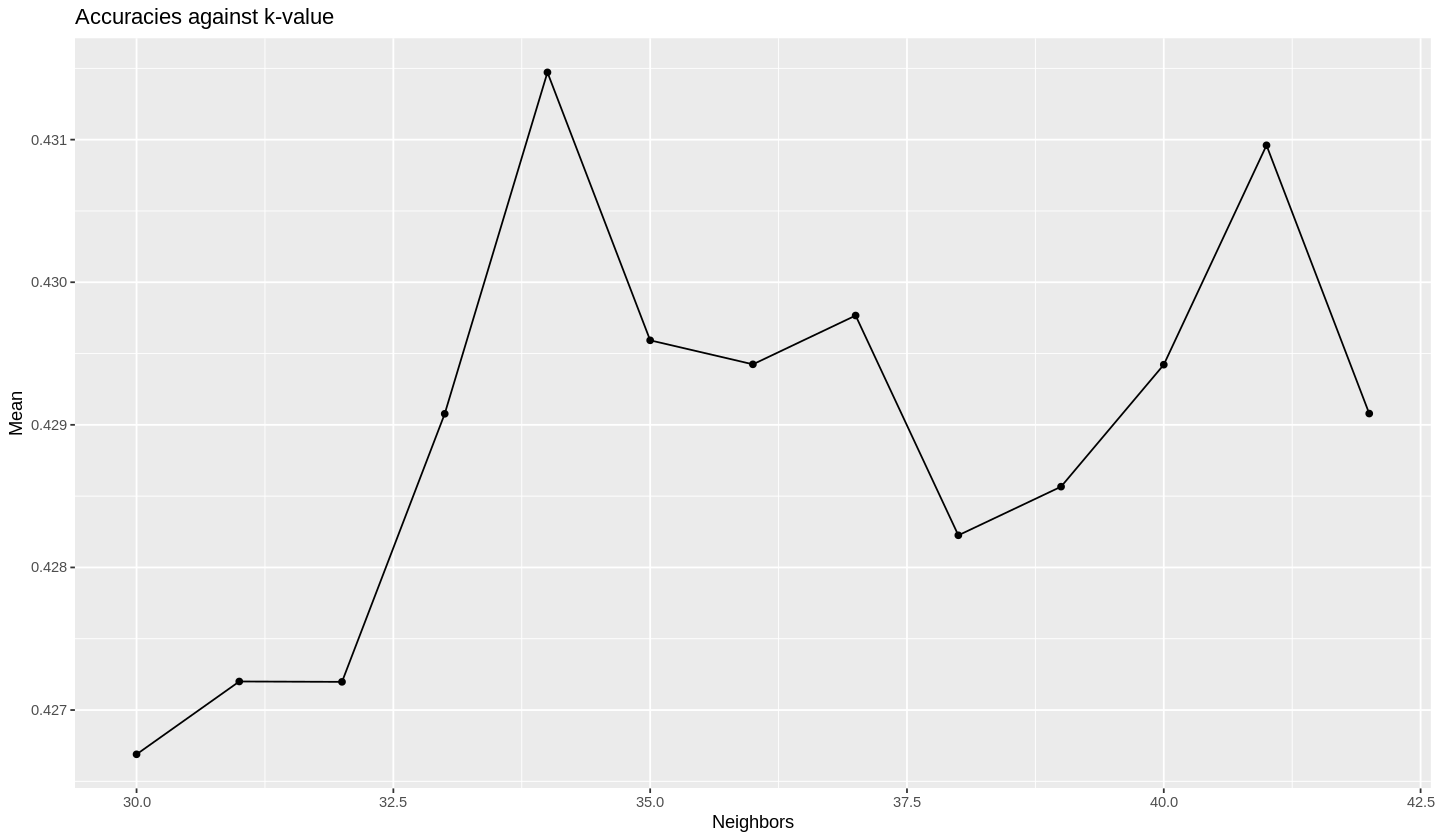

In [27]:
set.seed(69)
options(repr.plot.width = 12, repr.plot.height = 7)
# Here we are doing a 5-fold analysis to determine the best k-value for our classification process

# Recipe for standardizing our data
diets_recipe <- recipe(diet_type~., data = diets_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

diets_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

diets_vfold <- vfold_cv(diets_train, v = 5, strata = diet_type)

# v-fold workflow
knn_tune_fit <- workflow() |>
	add_recipe(diets_recipe) |>
	add_model(diets_spec) |>
	tune_grid(resamples = diets_vfold, grid =  tibble(neighbors = c(seq(from = 30, to = 42, by = 1)))) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

# Here we are plotting the results of the accuracies from the 5-fold analysis to find the best k-value
knn_plot <- ggplot(knn_tune_fit, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Mean") +
    ggtitle("Accuracies against k-value")
knn_plot

In [6]:
# classification process
best_k <- 34 # the k-value with the highest accuracy from the plot above
diets_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

# Workflow
diets_best_fit <- workflow() |>
    add_recipe(diets_recipe) |>
    add_model(diets_best_spec) |>
    fit(data = diets_train)

diets_test_predictions <- predict(diets_best_fit, diets_test) |>
    bind_cols(diets_test)

diets_test_predictions |>
  metrics(truth = diet_type, estimate = .pred_class) |>
  filter(.metric == "accuracy")
diets_test_predictions

# Here we are including a confusion matrix to see the accuracies pertaining to each diet type
diets_conf_mat <- conf_mat(diets_test_predictions, truth = diet_type, estimate = .pred_class)
diets_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4380757


.pred_class,diet_type,protein,carbs,fat
<fct>,<fct>,<dbl>,<dbl>,<dbl>
mediterranean,paleo,68.62,34.15,42.44
vegan,paleo,152.88,1874.52,385.80
vegan,paleo,46.69,192.54,156.48
⋮,⋮,⋮,⋮,⋮
vegan,dash,65.37,787.82,181.09
mediterranean,dash,85.20,288.14,137.15
dash,dash,155.38,239.88,260.84


               Truth
Prediction      paleo vegan keto mediterranean dash
  paleo            55    26   19            32   35
  vegan            75   215   20            91  121
  keto             87    23  261            79   67
  mediterranean    72    75   54           193   82
  dash             30    42   24            44  132

In [21]:
vegan_accuracy <- 215 / (26 + 215 + 23 + 75 + 42) # vegan_accuracy = 0.56
vegan_accuracy

keto_accuracy <- 261 / (19 + 20 + 261 + 54 + 24) # keto_accuracy = 0.69
keto_accuracy

[1] 0.5643045

[1] 0.6904762

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


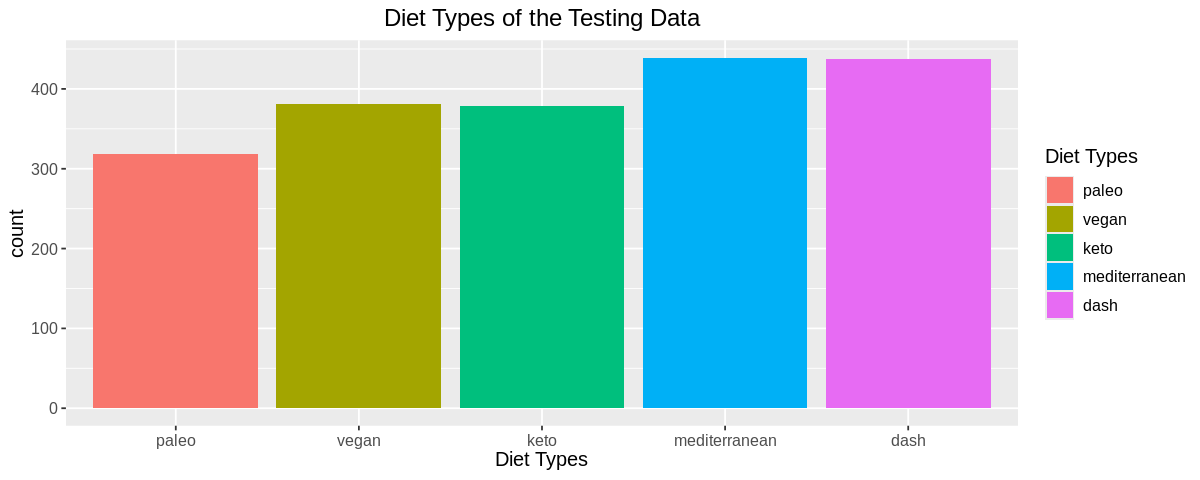

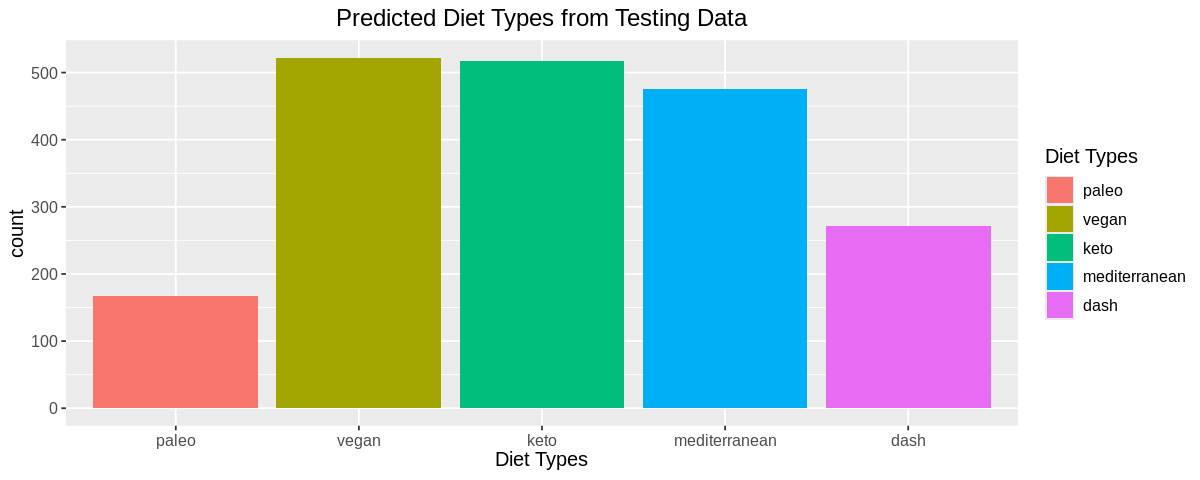

In [28]:
options(repr.plot.width = 10, repr.plot.height = 4)
# Here we are putting side-by-side a plot of the count of each diet type in the testing data and the count of each diet type in the 
# predictions from the testing data. We are doing this to visualize our prediction accuracies and see how close or far our predictions 
# are to the original count of each diet. We filled the columns by color corresponding to different diet types, and we also gave it
# readable axis and a title, as well as a legend.

diets_test_plot <- ggplot(diets_test, aes(x = diet_type, fill = diet_type)) +  #testing data
geom_histogram(stat = "count") +
labs(x = "Diet Types", fill = "Diet Types") +
ggtitle("Diet Types of the Testing Data") +
theme(text = element_text(size = 12), plot.title = element_text(hjust = 0.5))

diets_test_plot
 
diets_predictions_plot <- ggplot(diets_test_predictions, aes(x = .pred_class, fill = .pred_class)) + #results from data
geom_histogram(stat = "count") +
labs(x = "Diet Types", fill = "Diet Types") +
ggtitle("Predicted Diet Types from Testing Data") +
theme(text = element_text(size = 12), plot.title = element_text(hjust = 0.5))

diets_predictions_plot

## Discussion


We found that diet types are unable to be accurately found using the nutritional contents of dishes as the accuracy of the predictions was only around 44%. The most correctly predicted diet types were vegan and keto diets at 56% and 69% respectively.


The results were close to what we expected to find. In our proposal, we predicted from observation that a dish with high carbs and low protein is likely to be vegan, and a dish with high fat and low carbs is likely to be keto. As reflected from the prediction accuracies reported above, vegan and keto diets are in fact the most correctly predicted diet types, which is probably because of the diet types’ distinctive amount of specific nutritional contents. 


It was found that there is not a significant relationship between nutritional value and diet type, as the accuracy of the classification model was only ~44%. Thus, choosing specific diets do not seem to be based on the amount of protein, carbohydrates, and fat content in the dish. This suggests that there are other variables that classify each diet. For instance, vegan diets “abstains from all animal products,” paleo diets are grain-free, DASH diets emphasize veggies and whole grains to stop hypertension, Mediterranean diets lower omega-6/omega-3 ratio to lower risk of heart disease (https://par.nsf.gov/servlets/purl/10108015). 
An impact of these findings could be a higher awareness of the nutritional values of foods people eat during a diet, for example, a ketogenic diet may be low in carbohydrates but high in trans fats, or a vegan dish may not necessarily have low protein amounts.    


Our project of working with different diet types and predicting diet types based on the contents of different major food groups has already answered a lot of interesting questions and predictions for us. However, having done the data analysis and full visualisation to help answer our initial questions, the findings of this project can be used to explore further questions based on this topic of macronutrients contents in different major diet types. One future question that could be explored is that can we predict the dish's cuisine type with the same predictors instead of diet type? It’s interesting to examine the relationship between what a dish contains and its cuisine. Another question that we can research is the relationship between regions around the world and diet; more specifically, what diet is more prevalent in which parts of the world. Another future question that can be examined through this data is determining what diet type is best suited for different individuals just by observing the amounts of macronutrients in each type. From gathering certain criteria for daily intake of these macronutrients consumed, assigning the corresponding diet type should match well. This can be beneficial for individuals who are more aware of how much carbs, fats, or proteins they are eating per day and if they want to change their diet, this future question can help determine which diet type best suits them. 


## Reference

- Research related material: https://www.eatingwell.com/article/7902516/vegan-meal-plan-for-beginners/
- Source of dataset: https://www.kaggle.com/datasets/thedevastator/healthy-diet-recipes-a-comprehensive-dataset/data